In [1]:
import icarogw
from icarogw.cupy_pal import *
import matplotlib.pyplot as plt
import numpy as np
import corner
import h5py
from astropy.cosmology import FlatLambdaCDM

from astropy.cosmology import Planck15

cosmo_prova=icarogw.cosmology.astropycosmology(1.)
cosmo_prova.build_cosmology(Planck15)

Config not imported, automatically decides between Numpy and Cupy
CUPY NOT LOADED BACK TO NUMPY


In [8]:
ll = ['a','b','c']
a = ll
a.remove('b')

In [9]:
ll

['a', 'c']

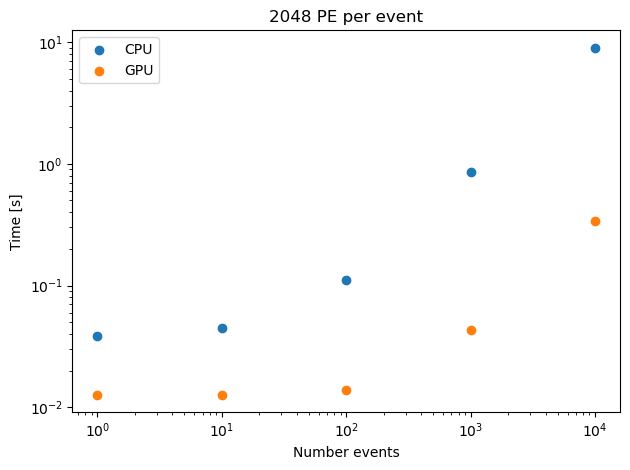

In [2]:
Nev=np.array([1,10,100,1000,10000])
data_cpu=np.genfromtxt('timing_cpu.txt')
data_gpu=np.genfromtxt('timing_gpu.txt')

plt.scatter(Nev,np.median(data_cpu,axis=0),label='CPU')
plt.scatter(Nev,np.median(data_gpu,axis=0),label='GPU')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Time [s]')
plt.xlabel('Number events')
plt.title('2048 PE per event')
plt.legend()
plt.tight_layout()

# Schechter function

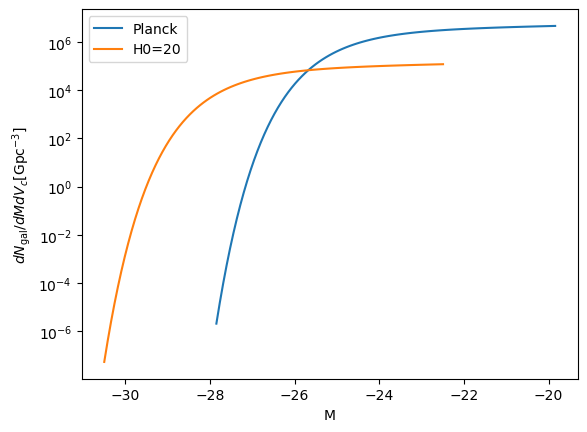

In [3]:
sch=icarogw.cosmology.galaxy_MF(band='K')

cosmo=icarogw.cosmology.astropycosmology(zmax=2)
cosmo.build_cosmology(FlatLambdaCDM(H0=67.7,Om0=0.308))
sch.build_MF(cosmo)
Marray=np.linspace(sch.Mminobs,sch.Mmaxobs,100)
plt.semilogy(Marray,cp2np(sch.evaluate(np2cp(Marray))),label='Planck')

cosmo=icarogw.cosmology.astropycosmology(zmax=2)
cosmo.build_cosmology(FlatLambdaCDM(H0=20,Om0=0.308))
sch.build_MF(cosmo)
Marray=np.linspace(sch.Mminobs,sch.Mmaxobs,100)
plt.semilogy(Marray,cp2np(sch.evaluate(np2cp(Marray))),label='H0=20')

plt.xlabel('M')
plt.ylabel(r'$dN_{\rm gal}/dMdV_c {\rm [Gpc^{-3}]}$')
plt.legend()

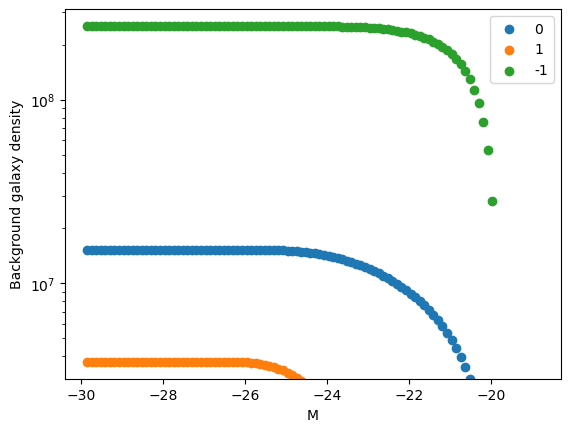

In [4]:
cosmo_prova=icarogw.cosmology.astropycosmology(zmax=5.)
cosmo_prova.build_cosmology(Planck15)

sch=icarogw.catalog.galaxy_MF(band='K')
abs_rate=icarogw.cosmology.log_powerlaw_absM_rate(epsilon=0.)
sch.build_MF(cosmo_prova)
sch.build_effective_number_density_interpolant(abs_rate.epsilon)

Mv=xp.linspace(sch.Mminobs-2,sch.Mmaxobs+1,100)

abs_rate=icarogw.cosmology.log_powerlaw_absM_rate(epsilon=0.)
sch.build_effective_number_density_interpolant(abs_rate.epsilon)
plt.scatter(cp2np(Mv),cp2np(sch.background_effective_galaxy_density(Mv)),label='0')

abs_rate=icarogw.cosmology.log_powerlaw_absM_rate(epsilon=1.)
sch.build_effective_number_density_interpolant(abs_rate.epsilon)
plt.scatter(cp2np(Mv),cp2np(sch.background_effective_galaxy_density(Mv)),label='1')

abs_rate=icarogw.cosmology.log_powerlaw_absM_rate(epsilon=-1.)
sch.build_effective_number_density_interpolant(abs_rate.epsilon)
plt.scatter(cp2np(Mv),cp2np(sch.background_effective_galaxy_density(Mv)),label='-1')

plt.legend()
plt.ylabel('Background galaxy density')
plt.xlabel('M')
plt.yscale('log')

# TGR

In [5]:
cosmo=icarogw.cosmology.astropycosmology(zmax=10.)
cosmo.build_cosmology(Planck15)

cosmo_extraD=icarogw.cosmology.extraD_astropycosmology(zmax=10.)
cosmo_extraD.build_cosmology(Planck15,D=4.5,n=1.,Rc=1000.)

cosmo_Xi0=icarogw.cosmology.Xi0_astropycosmology(zmax=10.)
cosmo_Xi0.build_cosmology(Planck15,Xi0=4.,n=2.)

cosmo_cM=icarogw.cosmology.cM_astropycosmology(zmax=10.)
cosmo_cM.build_cosmology(Planck15,cM=5.)

cosmo_alphalog=icarogw.cosmology.alphalog_astropycosmology(zmax=10.)
cosmo_alphalog.build_cosmology(Planck15,alphalog_1=1.,alphalog_2=0.1,alphalog_3=0.04)

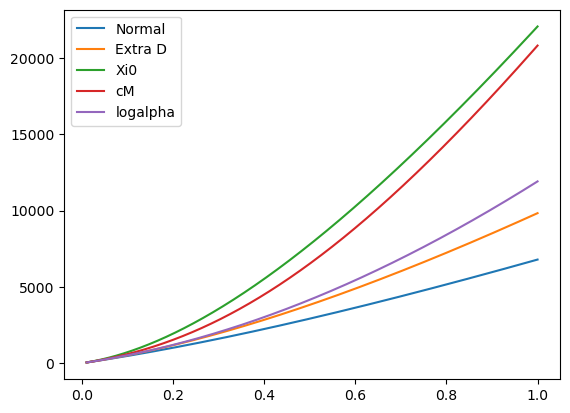

In [6]:
z_array=xp.linspace(0.01,1,1000)
plt.plot(cp2np(z_array),cp2np(cosmo.z2dl(z_array)),label='Normal')
plt.plot(cp2np(z_array),cp2np(cosmo_extraD.z2dl(z_array)),label='Extra D')
plt.plot(cp2np(z_array),cp2np(cosmo_Xi0.z2dl(z_array)),label='Xi0')
plt.plot(cp2np(z_array),cp2np(cosmo_cM.z2dl(z_array)),label='cM')
plt.plot(cp2np(z_array),cp2np(cosmo_alphalog.z2dl(z_array)),label='logalpha')
plt.legend()

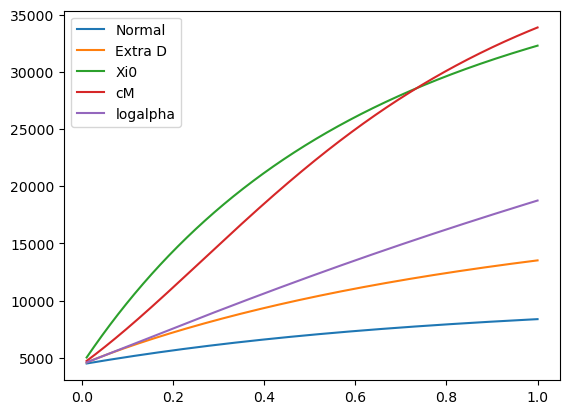

In [7]:
z_array=xp.linspace(0.01,1,1000)
plt.plot(cp2np(z_array),cp2np(cosmo.ddl_by_dz_at_z(z_array)),label='Normal')
plt.plot(cp2np(z_array),cp2np(cosmo_extraD.ddl_by_dz_at_z(z_array)),label='Extra D')
plt.plot(cp2np(z_array),cp2np(cosmo_Xi0.ddl_by_dz_at_z(z_array)),label='Xi0')
plt.plot(cp2np(z_array),cp2np(cosmo_cM.ddl_by_dz_at_z(z_array)),label='cM')
plt.plot(cp2np(z_array),cp2np(cosmo_alphalog.ddl_by_dz_at_z(z_array)),label='logalpha')
plt.legend()

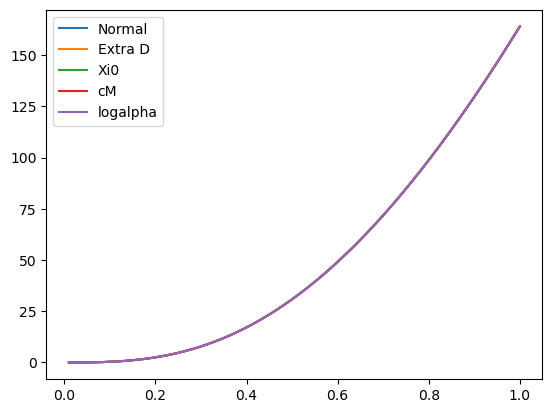

In [8]:
z_array=xp.linspace(0.01,1,1000)
plt.plot(cp2np(z_array),cp2np(cosmo.z2Vc(z_array)),label='Normal')
plt.plot(cp2np(z_array),cp2np(cosmo_extraD.z2Vc(z_array)),label='Extra D')
plt.plot(cp2np(z_array),cp2np(cosmo_Xi0.z2Vc(z_array)),label='Xi0')
plt.plot(cp2np(z_array),cp2np(cosmo_cM.z2Vc(z_array)),label='cM')
plt.plot(cp2np(z_array),cp2np(cosmo_alphalog.z2Vc(z_array)),label='logalpha')
plt.legend()

# Priors module tests

/home/simone/Desktop/icarogwCAT/icarogwCAT/icarogw/priors.py:72: RuntimeWarning: overflow encountered in exp
  effe_prime[select_window] = xp.exp(xp.nan_to_num((delta_m/mprime[select_window])+(delta_m/(mprime[select_window]-delta_m))))
/home/simone/Desktop/icarogwCAT/icarogwCAT/icarogw/priors.py:341: RuntimeWarning: divide by zero encountered in log
  prob_ret =self.origin_prob.log_pdf(x)+xp.log(window)-xp.log(self.norm)
/home/simone/Desktop/icarogwCAT/icarogwCAT/icarogw/priors.py:368: RuntimeWarning: divide by zero encountered in log
  return xp.log(toret).reshape(origin)


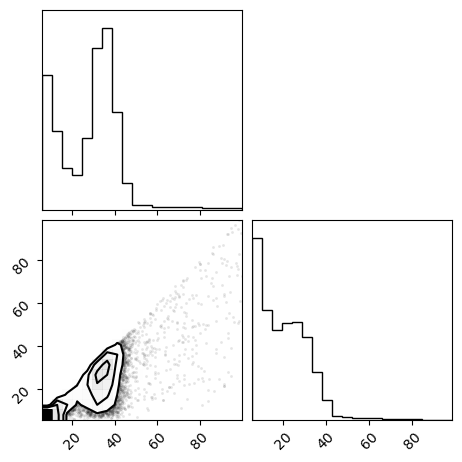

In [9]:
mass_prob=icarogw.wrappers.massprior_MultiPeak()
mass_prob.update(alpha=2.0,beta=1.0,mmin=5.,mmax=100.,delta_m=5.,mu_g_low=9.,sigma_g_low=1.,lambda_g_low=0.05,
                     mu_g_high=35.,sigma_g_high=5.,lambda_g=0.5)
m1,m2=mass_prob.prior.sample(10000)
_=corner.corner(cp2np(xp.column_stack([m1,m2])))

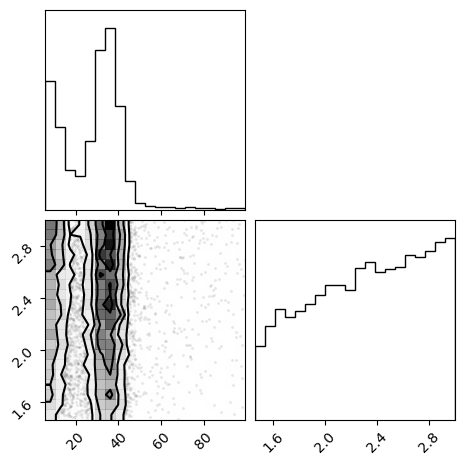

In [10]:
mass_prob=icarogw.wrappers.massprior_MultiPeak_NSBH()
mass_prob.update(alpha=2.0,beta=1.0,mmin=5.,mmax=100.,delta_m=5.,mu_g_low=9.,sigma_g_low=1.,lambda_g_low=0.05,
                     mu_g_high=35.,sigma_g_high=5.,lambda_g=0.5,mmin_NS=1.44,mmax_NS=3.,delta_m_NS=0.1)
m1,m2=mass_prob.prior.sample(10000)
_=corner.corner(cp2np(xp.column_stack([m1,m2])))

/home/simone/Desktop/icarogwCAT/icarogwCAT/icarogw/priors.py:431: RuntimeWarning: divide by zero encountered in log
  toret =xp.log(((xp.power(x,self.alpha+1)-xp.power(self.minpl,self.alpha+1))/(self.alpha+1))/self.norm_fact)


Text(0, 0.5, 'PDF')

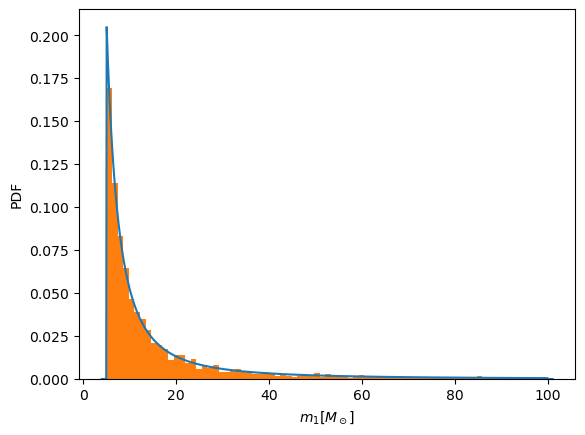

In [11]:
## Powerlaw
prob=icarogw.priors.PowerLaw(5.0,100.,-2.)
MM=xp.linspace(4,101,1000)
plt.plot(cp2np(MM),cp2np(prob.pdf(MM)))
samps=prob.sample(5000)
_=plt.hist(cp2np(samps),bins='auto',density=True)
plt.xlabel(r'$m_1[M_\odot]$')
plt.ylabel('PDF')

/home/simone/Desktop/icarogwCAT/icarogwCAT/icarogw/priors.py:557: RuntimeWarning: divide by zero encountered in log
  toret = xp.log((0.5*erf(max_point)-0.5*erf(min_point))/self.norm_fact)


Text(0, 0.5, 'PDF')

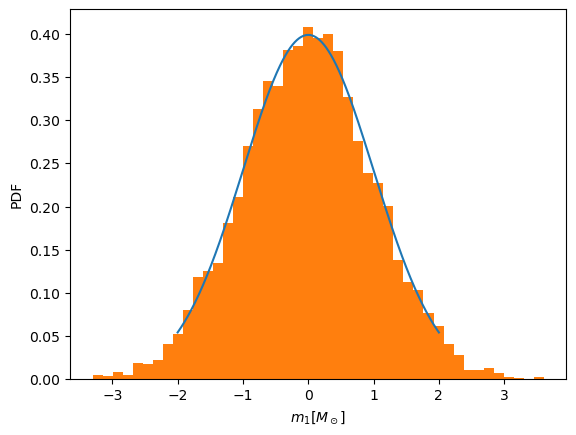

In [12]:
## Gaussian

prob=icarogw.priors.TruncatedGaussian(0.,1.,-5,5.)
MM=xp.linspace(-2,2,1000)
plt.plot(cp2np(MM),cp2np(prob.pdf(MM)))
samps=prob.sample(5000)
_=plt.hist(cp2np(samps),bins='auto',density=True)

plt.xlabel(r'$m_1[M_\odot]$')
plt.ylabel('PDF')

0.9996055029330345


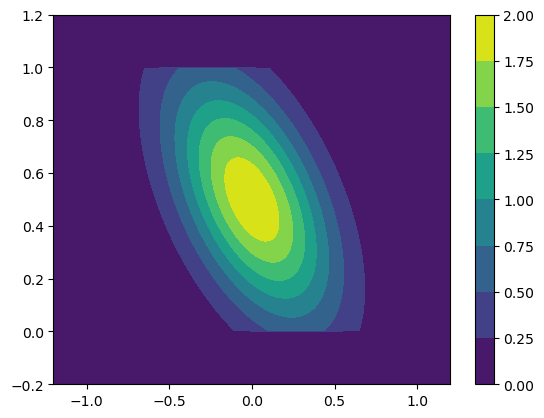

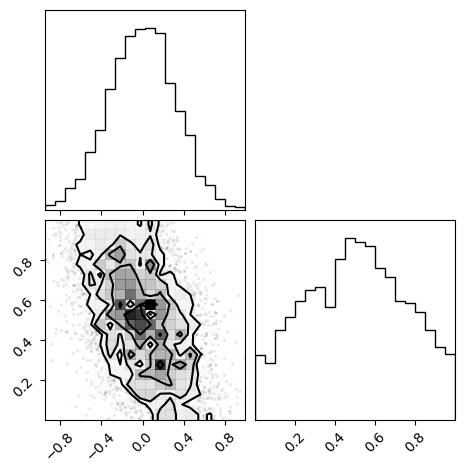

In [13]:
## 2Dgaussian
prob=icarogw.priors.Bivariate2DGaussian(x1min=-1,
    x1max=1.,
    x1mean=0.,
    x2min=0.,
    x2max=1.,
    x2mean=0.5,
    x1variance=0.1,
    x12covariance=-.05,
    x2variance=0.1)

M1,M2=xp.meshgrid(xp.linspace(-1.2,1.2,200),xp.linspace(-0.2,1.2,200))
val=prob.pdf(M1,M2)
plt.contourf(cp2np(M1),cp2np(M2),cp2np(prob.pdf(M1,M2)))
plt.colorbar()

dM1,dM2=M1[1,1]-M1[0,0],M2[1,1]-M2[0,0]
print(np.sum(val)*dM1*dM2)
_=corner.corner(cp2np(xp.column_stack(prob.sample(5000))))

/home/simone/Desktop/icarogwCAT/icarogwCAT/icarogw/priors.py:479: RuntimeWarning: divide by zero encountered in log
  toret=(self.alpha-1.)*xp.log(x)+(self.beta-1.)*xp.log1p(-x)-xp.log(self.norm_fact)
/home/simone/Desktop/icarogwCAT/icarogwCAT/icarogw/priors.py:479: RuntimeWarning: divide by zero encountered in log1p
  toret=(self.alpha-1.)*xp.log(x)+(self.beta-1.)*xp.log1p(-x)-xp.log(self.norm_fact)
/home/simone/Desktop/icarogwCAT/icarogwCAT/icarogw/priors.py:495: RuntimeWarning: divide by zero encountered in log
  toret = xp.log(betainc(self.alpha,self.beta,x))


Text(0, 0.5, 'PDF')

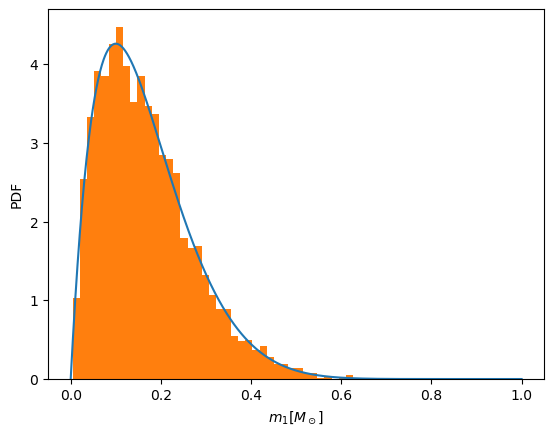

In [14]:
## Beta

prob=icarogw.priors.BetaDistribution(2.,10.)
MM=xp.linspace(0,1,1000)
plt.plot(cp2np(MM),cp2np(prob.pdf(MM)))
samps=prob.sample(5000)
_=plt.hist(cp2np(samps),bins='auto',density=True)

plt.xlabel(r'$m_1[M_\odot]$')
plt.ylabel('PDF')

/home/simone/Desktop/icarogwCAT/icarogwCAT/icarogw/priors.py:682: RuntimeWarning: divide by zero encountered in log
  toret=xp.log((1-self.lambdag)*self.PL.cdf(x)+self.lambdag*self.TG.cdf(x))


Text(0, 0.5, 'PDF')

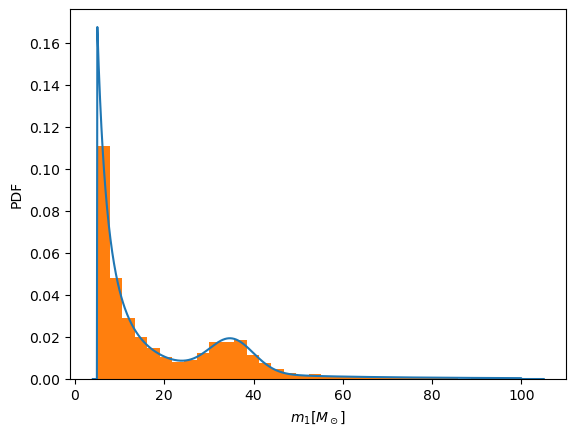

In [15]:
## Powerlaw+Gaussian

prob=icarogw.priors.PowerLawGaussian(5,100,-2.,0.2,35,5,5,100)
MM=xp.linspace(4,105,1000)
plt.plot(cp2np(MM),cp2np(prob.pdf(MM)))
samps=prob.sample(5000)
_=plt.hist(cp2np(samps),bins='auto',density=True)
plt.xlabel(r'$m_1[M_\odot]$')
plt.ylabel('PDF')

Text(0, 0.5, 'PDF')

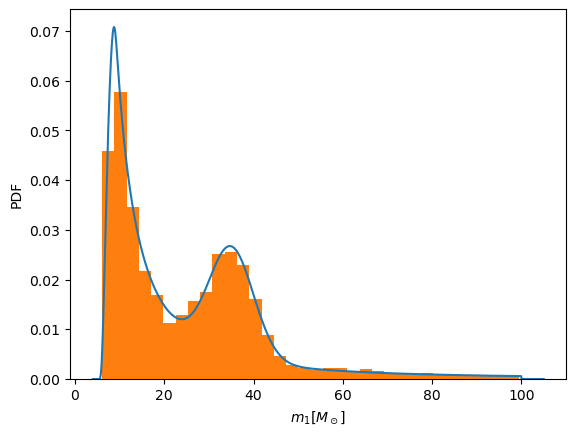

In [16]:
## PLG

prob=icarogw.priors.PowerLawGaussian(5,100,-2.,0.2,35,5,5,100)
prob=icarogw.priors.SmoothedProb(prob,5.)
MM=xp.linspace(4,105,1000)
plt.plot(cp2np(MM),cp2np(prob.pdf(MM)))
samps=prob.sample(5000)
_=plt.hist(cp2np(samps),bins='auto',density=True)
plt.xlabel(r'$m_1[M_\odot]$')
plt.ylabel('PDF')

/home/simone/Desktop/icarogwCAT/icarogwCAT/icarogw/priors.py:429: RuntimeWarning: divide by zero encountered in log
  toret = xp.log(xp.log(x/self.minval)/self.norm_fact)
/home/simone/Desktop/icarogwCAT/icarogwCAT/icarogw/priors.py:431: RuntimeWarning: invalid value encountered in log
  toret =xp.log(((xp.power(x,self.alpha+1)-xp.power(self.minpl,self.alpha+1))/(self.alpha+1))/self.norm_fact)
/home/simone/Desktop/icarogwCAT/icarogwCAT/icarogw/priors.py:733: RuntimeWarning: divide by zero encountered in log
  toret=xp.log((self.PL1.cdf(x)+self.PL2.cdf(x)*


Text(0, 0.5, 'PDF')

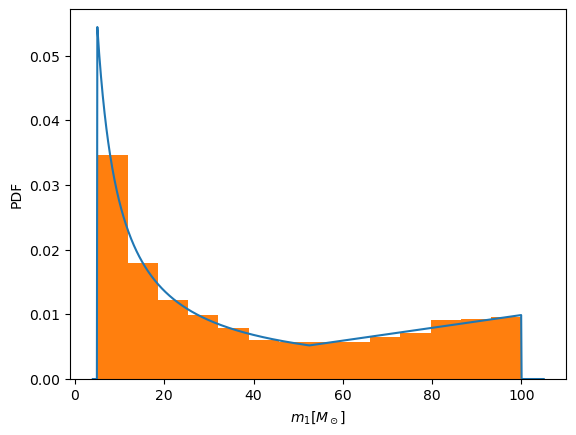

In [17]:
## Powerlaw Broken PL

prob=icarogw.priors.BrokenPowerLaw(5,100,-1.,1.0,0.5)
MM=xp.linspace(4,105,1000)
plt.plot(cp2np(MM),cp2np(prob.pdf(MM)))
samps=prob.sample(5000)
_=plt.hist(cp2np(samps),bins='auto',density=True)
plt.xlabel(r'$m_1[M_\odot]$')
plt.ylabel('PDF')

/home/simone/Desktop/icarogwCAT/icarogwCAT/icarogw/priors.py:793: RuntimeWarning: divide by zero encountered in log
  return xp.log(pl_part+g_part)


Text(0, 0.5, 'PDF')

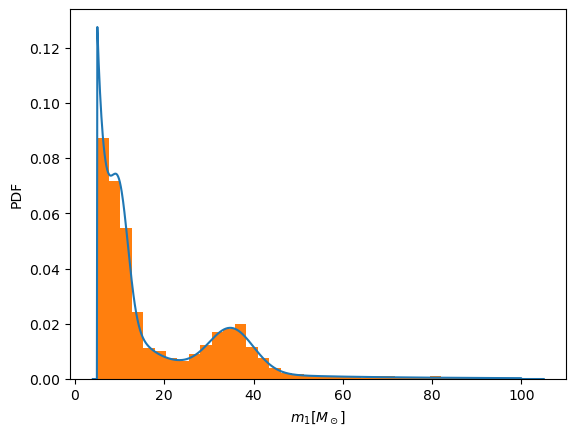

In [18]:
## Multi-Peak
prob=icarogw.priors.PowerLawTwoGaussians(5,100,-2.,0.4,0.5,10,2,5,100,35,5,5,100)
MM=xp.linspace(4,105,1000)
plt.plot(cp2np(MM),cp2np(prob.pdf(MM)))
samps=prob.sample(5000)
_=plt.hist(cp2np(samps),bins='auto',density=True)
plt.xlabel(r'$m_1[M_\odot]$')
plt.ylabel('PDF')

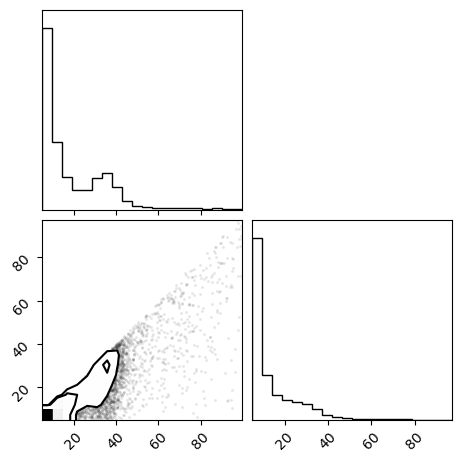

In [19]:
prob1=icarogw.priors.PowerLawGaussian(5,100,-2.,0.2,35,5,5,100)
prob2=icarogw.priors.PowerLaw(5,100,1.)
prob=icarogw.priors.conditional_2dimpdf(prob1,prob2)
m1,m2=prob.sample(10000)
_=corner.corner(cp2np(xp.column_stack([m1,m2])))

/home/simone/Desktop/icarogwCAT/icarogwCAT/icarogw/priors.py:255: RuntimeWarning: invalid value encountered in subtract
  y=self.pdf1.log_pdf(x1)+self.pdf2.log_pdf(x2)-self.pdf2.log_cdf(x1)
/tmp/ipykernel_37932/3323428883.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(cp2np(M1),cp2np(M2),np.log10(cp2np(prob.pdf(M1,M2))))


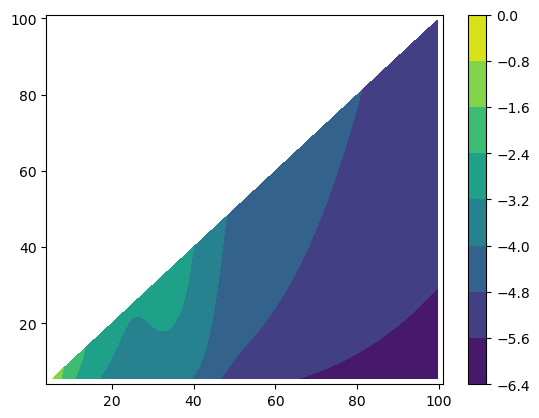

In [20]:
M1,M2=xp.meshgrid(xp.linspace(4,101,200),xp.linspace(4,101,200))
val=prob.pdf(M1,M2)
plt.contourf(cp2np(M1),cp2np(M2),np.log10(cp2np(prob.pdf(M1,M2))))
plt.colorbar()

/home/simone/Desktop/icarogwCAT/icarogwCAT/icarogw/priors.py:839: RuntimeWarning: divide by zero encountered in log
  toret=xp.log(1.-self.L_PL_CDF.cdf(M2L(M)))


Text(0, 0.5, 'PDF')

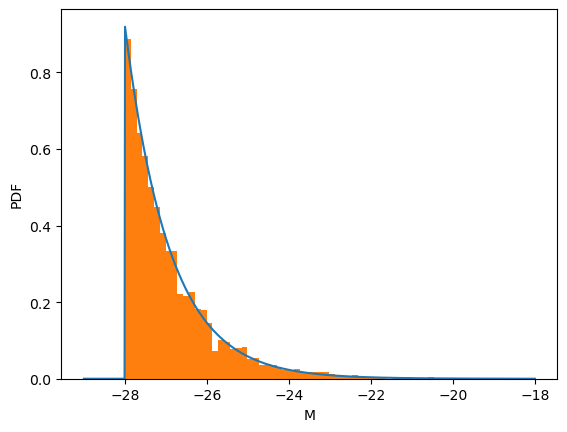

In [21]:
## Uniform in luminosity distribution as seen in apparent magnitude
prob=icarogw.priors.absL_PL_inM(-28,-19,-0.0)
MM=xp.linspace(-29,-18,1000)
plt.plot(cp2np(MM),cp2np(prob.pdf(MM)))
samps=prob.sample(5000)
_=plt.hist(cp2np(samps),bins='auto',density=True)
plt.xlabel('M')
plt.ylabel('PDF')

Text(0, 0.5, 'PDF')

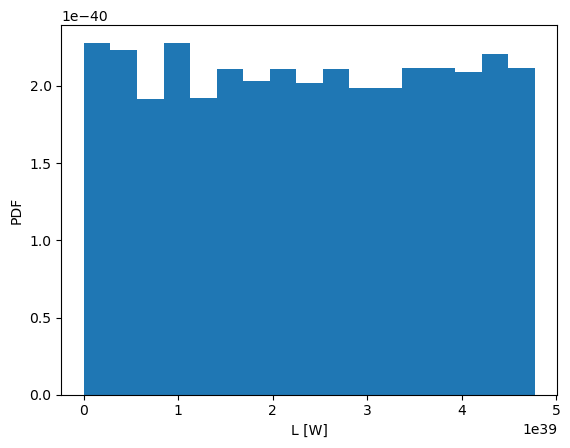

In [22]:
_=plt.hist(cp2np(icarogw.conversions.M2L(samps)),bins='auto',density=True)
plt.xlabel('L [W]')
plt.ylabel('PDF')

# Cosmology module tests

In [23]:
from astropy.cosmology import Planck15
cosmo_prova=icarogw.cosmology.astropycosmology(10)
cosmo_prova.build_cosmology(Planck15)

/home/simone/Desktop/icarogwCAT/icarogwCAT/icarogw/cosmology.py:39: RuntimeWarning: divide by zero encountered in log10
  ravelled=xp.ravel(xp.log10(z))


Text(0, 0.5, 'dl [Mpc]')

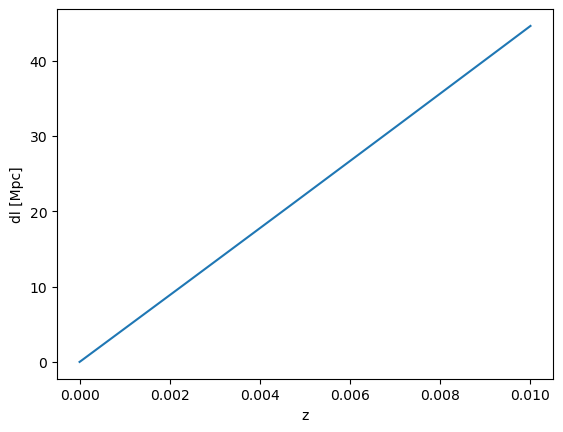

In [24]:
z=xp.linspace(0,0.01,1000)
dl=cosmo_prova.z2dl(z)
plt.plot(cp2np(z),cp2np(dl))
plt.xlabel('z')
plt.ylabel('dl [Mpc]')

/home/simone/Desktop/icarogwCAT/icarogwCAT/icarogw/cosmology.py:78: RuntimeWarning: divide by zero encountered in log10
  ravelled=xp.ravel(xp.log10(dl))


Text(0, 0.5, 'dl [Mpc]')

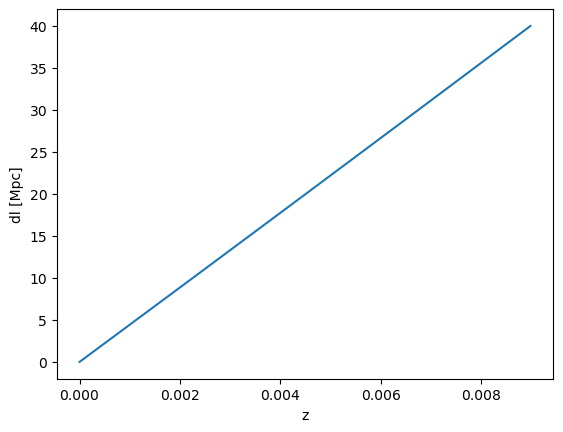

In [25]:
dl=xp.linspace(0,40,1000)
z=cosmo_prova.dl2z(dl)
plt.plot(cp2np(z),cp2np(dl))
plt.xlabel('z')
plt.ylabel('dl [Mpc]')

/home/simone/Desktop/icarogwCAT/icarogwCAT/icarogw/cosmology.py:97: RuntimeWarning: divide by zero encountered in log10
  ravelled=xp.ravel(xp.log10(z))


Text(0, 0.5, 'dl [Mpc]')

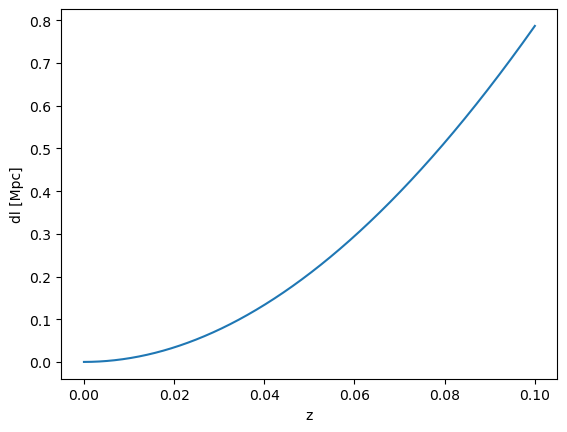

In [26]:
z=xp.linspace(0,0.1,1000)
dl=cosmo_prova.dVc_by_dzdOmega_at_z(z)
plt.plot(cp2np(z),cp2np(dl))
plt.xlabel('z')
plt.ylabel('dl [Mpc]')

/home/simone/Desktop/icarogwCAT/icarogwCAT/icarogw/cosmology.py:58: RuntimeWarning: divide by zero encountered in log10
  ravelled=xp.ravel(xp.log10(z))


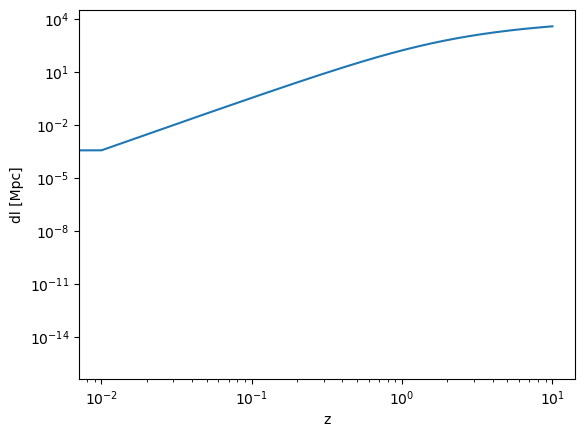

In [27]:
z=xp.linspace(0,10,1000)
dl=cosmo_prova.z2Vc(z)
plt.plot(cp2np(z),cp2np(dl))
plt.xlabel('z')
plt.ylabel('dl [Mpc]')
plt.xscale('log')
plt.yscale('log')

In [28]:
cosmo_prova.z2Vc(xp.array([0]))

array([3.63090461e-16])

Text(0, 0.5, 'V_c[Gpc3]')

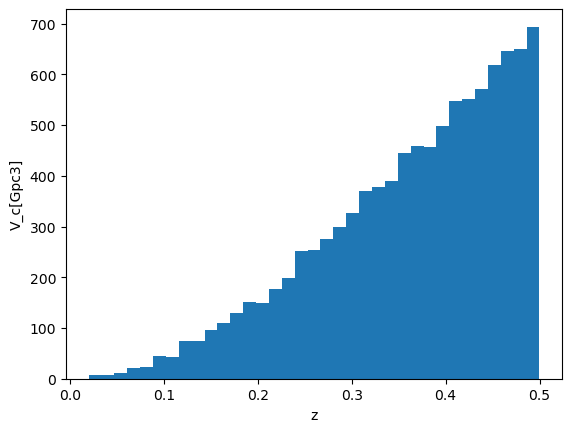

In [29]:
zgal=cosmo_prova.sample_comoving_volume(10000,0.0,0.5)
_=plt.hist(cp2np(zgal),bins='auto')
plt.xlabel('z')
plt.ylabel('V_c[Gpc3]')


## Catalog

In [30]:
import icarogw
from icarogw.cupy_pal import *
import matplotlib.pyplot as plt
import numpy as np
import corner
import h5py
from astropy.cosmology import FlatLambdaCDM

from astropy.cosmology import Planck15

In [31]:
import healpy as hp
nside=64
GW170817=h5py.File('/home/simone/Desktop/PE/GWTC-1/GW170817.hdf5')

In [32]:
ppd={'mass_1':GW170817['IMRPhenomPv2NRT_highSpin_posterior']['m1_detector_frame_Msun'],
    'mass_2':GW170817['IMRPhenomPv2NRT_highSpin_posterior']['m2_detector_frame_Msun'],
    'luminosity_distance':GW170817['IMRPhenomPv2NRT_highSpin_posterior']['luminosity_distance_Mpc'],
    'right_ascension':GW170817['IMRPhenomPv2NRT_highSpin_posterior']['right_ascension'],
    'declination':GW170817['IMRPhenomPv2NRT_highSpin_posterior']['declination']}

posterior_dict={'GW170817':icarogw.posterior_samples.posterior_samples(ppd,
                                                                         prior=np.power(GW170817['IMRPhenomPv2NRT_highSpin_posterior']['luminosity_distance_Mpc'],2.))}
posterior_dict['GW170817'].pixelize(nside)

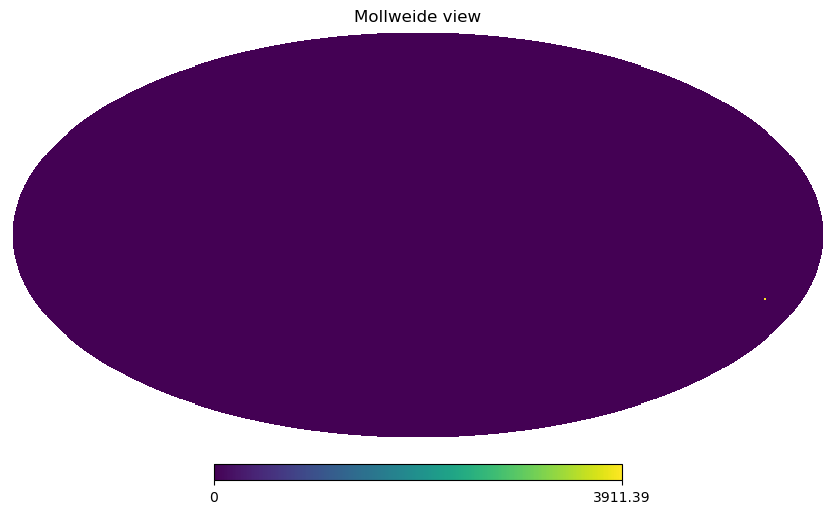

In [33]:
counts_map,domega=icarogw.conversions.radec2skymap(
    posterior_dict['GW170817'].posterior_data['right_ascension'],posterior_dict['GW170817'].posterior_data['declination'],nside=nside)
hp.mollview(counts_map)

In [34]:
cosmo_ref=icarogw.cosmology.astropycosmology(zmax=5.)
cosmo_ref.build_cosmology(FlatLambdaCDM(H0=67.7,Om0=0.308))

In [35]:
#cat=icarogw.catalog.galaxy_catalog('../glade+.hdf5','K',nside,mthr_percentile='empty',Lfuncmod=1.)

In [ ]:
data=h5py.File('../glade+.hdf5')

cat = icarogw.catalog.galaxy_catalog()

cat_data={}
for key in ['ra','dec','z','sigmaz','m_K']:
    if key == 'm_K':
        cat_data['m']=data[key][:]
    else:
        cat_data[key]=data[key][:]

cat.create_hdf5(filename='glade+_kband.hdf5',
                cat_data=cat_data,
                band='K',nside=nside)

cat.calculate_mthr(50)

cat.calc_dN_by_dzdOmega_interpolant(cosmo_ref,0.,Nres=1,zcut=0.1,ptype='gaussian',Numsigma=3.)

In [ ]:
cat = icarogw.catalog.galaxy_catalog()
cat.load_hdf5('glade+_kband.hdf5',cosmo_ref=cosmo_ref)

In [ ]:
zarr=xp.linspace(1e-4,0.05,100)
gp,bp=cat.effective_galaxy_number_interpolant(zarr,xp.random.permutation(np2cp(
posterior_dict['GW170817'].posterior_data['sky_indices']))[:len(zarr):],cosmo_ref)
plt.plot(cp2np(zarr),cp2np(gp))
plt.plot(cp2np(zarr),cp2np(bp))

In [ ]:
_=cat.check_differential_effective_galaxies(zarr,xp.random.permutation(np2cp(
posterior_dict['GW170817'].posterior_data['sky_indices']))[:100:],cosmo_ref)

## Wrappers

In [ ]:
mw=icarogw.wrappers.massprior_PowerLaw()
mw.update(alpha=0.,beta=0.,mmin=1,mmax=3.)
mw.prior

rw=icarogw.wrappers.rateevolution_Madau()
rw.update(gamma=0.,kappa=6.0,zp=2.4)

## Injections

In [ ]:
data=h5py.File('../endo3_bnspop-LIGO-T2100113-v12.hdf5')
cosmo_ref=icarogw.cosmology.astropycosmology(10)
cosmo_ref.build_cosmology(Planck15)

ifarmax=np.vstack([data['injections'][key] for key in ['ifar_cwb', 'ifar_gstlal', 'ifar_mbta', 'ifar_pycbc_bbh', 'ifar_pycbc_hyperbank']])
ifarmax=np.max(ifarmax,axis=0)
time_O3 = (28519200/86400)/365 # Time of observation for O3

prior=np2cp(data['injections/mass1_source_mass2_source_sampling_pdf'][()]*data['injections/redshift_sampling_pdf'][()]/(np.pi*4))
prior*=icarogw.conversions.source2detector_jacobian(np2cp(data['injections/redshift'][()]),cosmo_ref)

In [ ]:
injections_dict={'mass_1':data['injections/mass1'][()],'mass_2':data['injections/mass2'][()],
                'luminosity_distance':data['injections/distance'][()],
                'right_ascension':data['injections/right_ascension'][()],'declination':data['injections/declination'][()]}
inj=icarogw.injections.detector_injections_CBC_catalog(injections_dict,prior=prior,ntotal=data.attrs['total_generated'],Tobs=time_O3)
inj.update_cut(ifarmax>=4)
inj.pixelize(nside=64)
inj.cupyfy()



In [ ]:
import time
start=time.time()
inj.update_galaxies(cat,cosmo_ref,mw,rw)
print(inj.expected_number_detection_galaxies(3.2e-5))
print(inj.effective_detection_number(inj.weights_gal))
print('Time:',time.time()-start)

In [ ]:
mw=icarogw.wrappers.massprior_MultiPeak()
mw.update(alpha=3.0,beta=1.0,mmin=5.,mmax=100.,delta_m=5.,mu_g_low=9.,sigma_g_low=1.,lambda_g_low=0.05,
                     mu_g_high=35.,sigma_g_high=5.,lambda_g=0.2)

rw=icarogw.wrappers.rateevolution_Madau()
rw.update(gamma=2.5,kappa=6.0,zp=2.4)

In [ ]:
data=h5py.File('../endo3_bbhpop-LIGO-T2100113-v12.hdf5')
cosmo_ref=icarogw.cosmology.astropycosmology(10)
cosmo_ref.build_cosmology(Planck15)

ifarmax=np.vstack([data['injections'][key] for key in ['ifar_cwb', 'ifar_gstlal', 'ifar_mbta', 'ifar_pycbc_bbh', 'ifar_pycbc_hyperbank']])
ifarmax=np.max(ifarmax,axis=0)
time_O3 = (28519200/86400)/365 # Time of observation for O3

prior=np2cp(data['injections/mass1_source_mass2_source_sampling_pdf'][()]*data['injections/redshift_sampling_pdf'][()])
prior*=icarogw.conversions.source2detector_jacobian(np2cp(data['injections/redshift'][()]),cosmo_ref)

In [ ]:
injections_dict={'mass_1':data['injections/mass1'][()],'mass_2':data['injections/mass2'][()],
                'luminosity_distance':data['injections/distance'][()]}
inj=icarogw.injections.detector_injections_CBC(injections_dict,prior=prior,ntotal=data.attrs['total_generated'],Tobs=time_O3)
inj.update_cut(ifarmax>=4)
inj.cupyfy()



In [ ]:
import time
start=time.time()
inj.update_VT(cosmo_ref,mw,rw)
print(inj.expected_number_detection(10))
print(inj.effective_detection_number(inj.weights))
print('Time:',time.time()-start)

## Some examples in terms of cosmology

In [ ]:
data=h5py.File('../endo3_bnspop-LIGO-T2100113-v12.hdf5')
cosmo_ref=icarogw.cosmology.astropycosmology(10)
cosmo_ref.build_cosmology(Planck15)

ifarmax=np.vstack([data['injections'][key] for key in ['ifar_cwb', 'ifar_gstlal', 'ifar_mbta', 'ifar_pycbc_bbh', 'ifar_pycbc_hyperbank']])
ifarmax=np.max(ifarmax,axis=0)
time_O3 = (28519200/86400)/365 # Time of observation for O3

prior=np2cp(data['injections/mass1_source_mass2_source_sampling_pdf'][()]*data['injections/redshift_sampling_pdf'][()]/(np.pi*4))
prior*=icarogw.conversions.source2detector_jacobian(np2cp(data['injections/redshift'][()]),cosmo_ref)

injections_dict={'mass_1':data['injections/mass1'][()],'mass_2':data['injections/mass2'][()],
                'luminosity_distance':data['injections/distance'][()],
                'right_ascension':data['injections/right_ascension'][()],'declination':data['injections/declination'][()]}
inj=icarogw.injections.detector_injections_CBC_catalog(injections_dict,prior=prior,ntotal=data.attrs['total_generated'],Tobs=time_O3)
inj.update_cut(ifarmax>=4)
inj.pixelize(nside=64)
inj.cupyfy()



In [ ]:
zarr=xp.linspace(1e-4,0.05,100)
gp,bp=cat.effective_galaxy_number_interpolant(zarr,xp.random.permutation(np2cp(
posterior_dict['GW170817'].posterior_data['sky_indices']))[:len(zarr):],cosmo_ref)
plt.plot(cp2np(zarr),cp2np(gp))
plt.plot(cp2np(zarr),cp2np(bp))

In [ ]:
posterior_dict

In [ ]:
cosmo_wrap=icarogw.wrappers.cosmology_wrappers_init('FlatLambdaCDM',zmax=2.)
mass_wrap=icarogw.wrappers.mass_wrappers_init('PowerLaw')
rate_wrap=icarogw.wrappers.rate_wrappers_init('Madau')
posterior_dict['GW170817'].pixelize(64)
likelihood=icarogw.likelihood.hierarchical_likelihood_galaxies(posterior_dict,inj,cat,cosmo_wrap,mass_wrap,rate_wrap,scale_free=True)

In [ ]:
import time
start=time.time()

H0vals=np.linspace(20,150,200)
ciao=np.ones_like(H0vals)
for i in range(len(ciao)):
    likelihood.parameters={'alpha': 0.,
 'beta': 0.,
 'mmin': 1.,
 'mmax': 2.,
 'gamma': 2.5,
 'kappa': 6.,
 'zp': 2.5,
 'H0': H0vals[i],
 'Om0': 0.308}
    ciao[i]=likelihood.log_likelihood()
end=time.time()
print((end-start)/100)

posterior=np.exp(ciao-ciao.max())
posterior/=np.trapz(posterior,H0vals)
plt.plot(H0vals,posterior)
plt.axvline(67)